# see Danieles Mail from 28.01.25

In [3]:
from utils.binaries import *
from utils.plotting import *
from utils.Auger.SD import UubRandoms

In [ ]:
RandomFiles = UubRandoms.UubRandom(station = "Svenja", detectors = "ssd")

px = np.zeros(10000)

for File in tools.ProgressBar(RandomFiles):
    for trace in File:

        px[np.max(trace['trace'])] += 1

tools.pickle_save('pulse_height_distribution.pkl', px)

KeyboardInterrupt: 

In [72]:
px = tools.pickle_load('pulse_height_distribution.pkl')

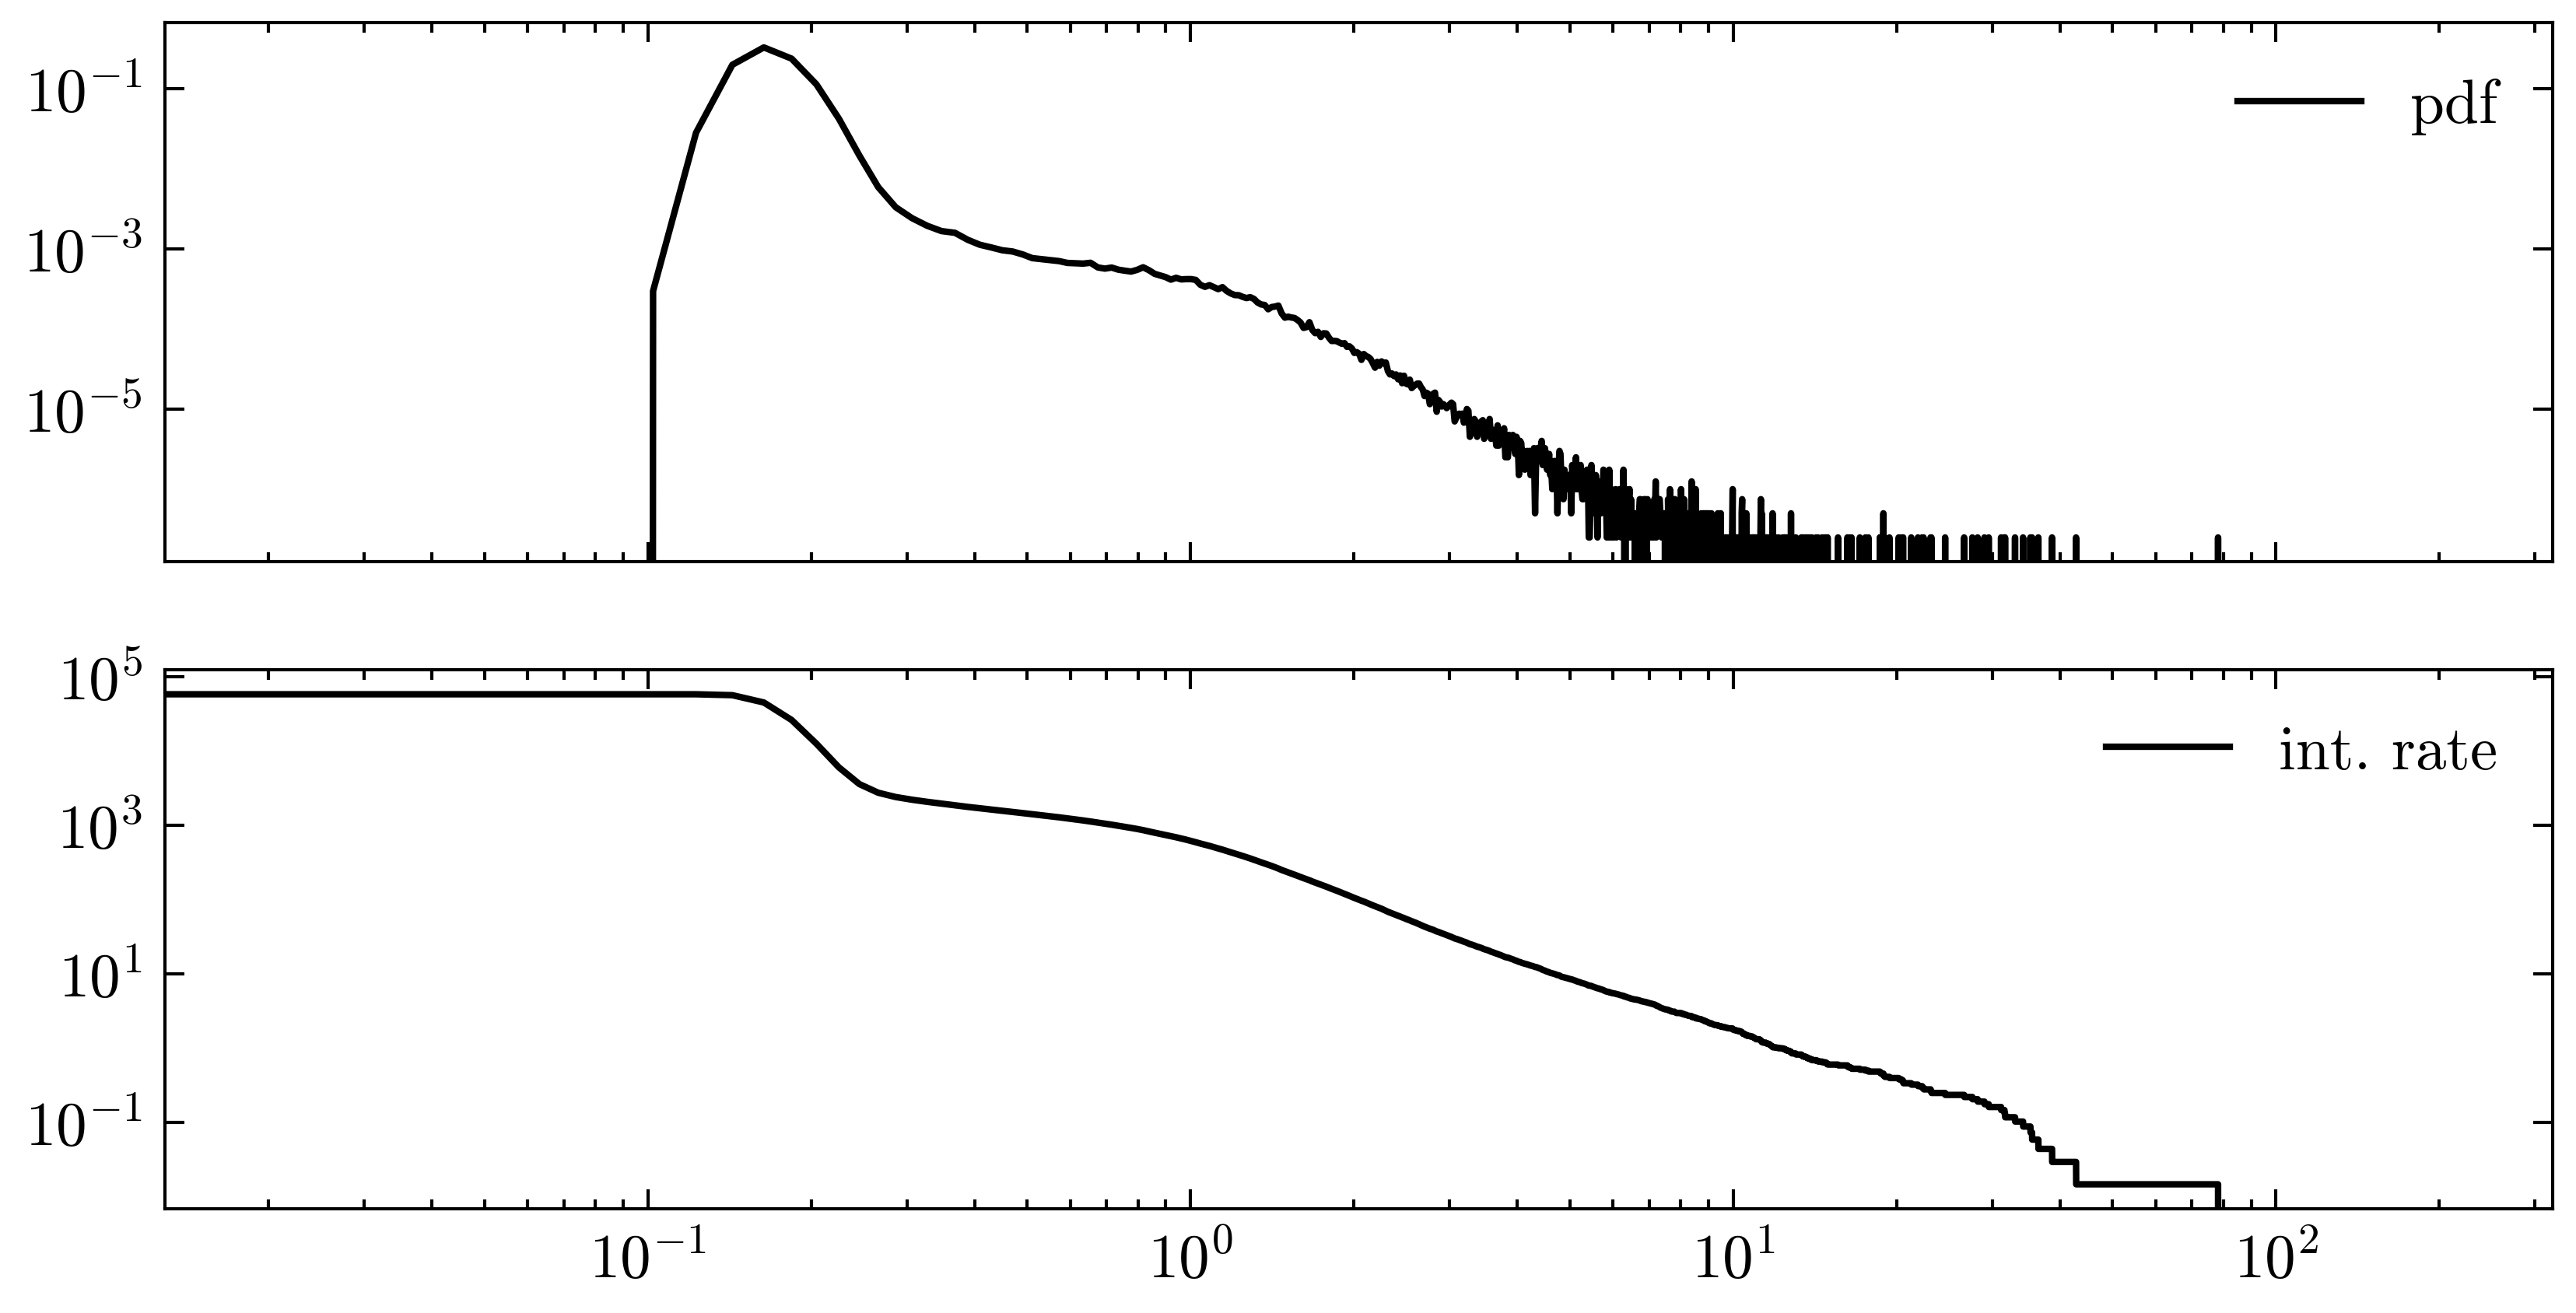

In [73]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# px[:70] = 0
cumsum = np.cumsum(px[::-1])[::-1]

ax1.plot(range(10000) / trace['mip_peak'], px/cumsum[0], label='pdf')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.legend()

ax2.plot(range(10000) / trace['mip_peak'], cumsum / (cumsum[0] * 2048 * 8.33e-9), label='int. rate')
ax2.set_yscale('log')
ax2.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


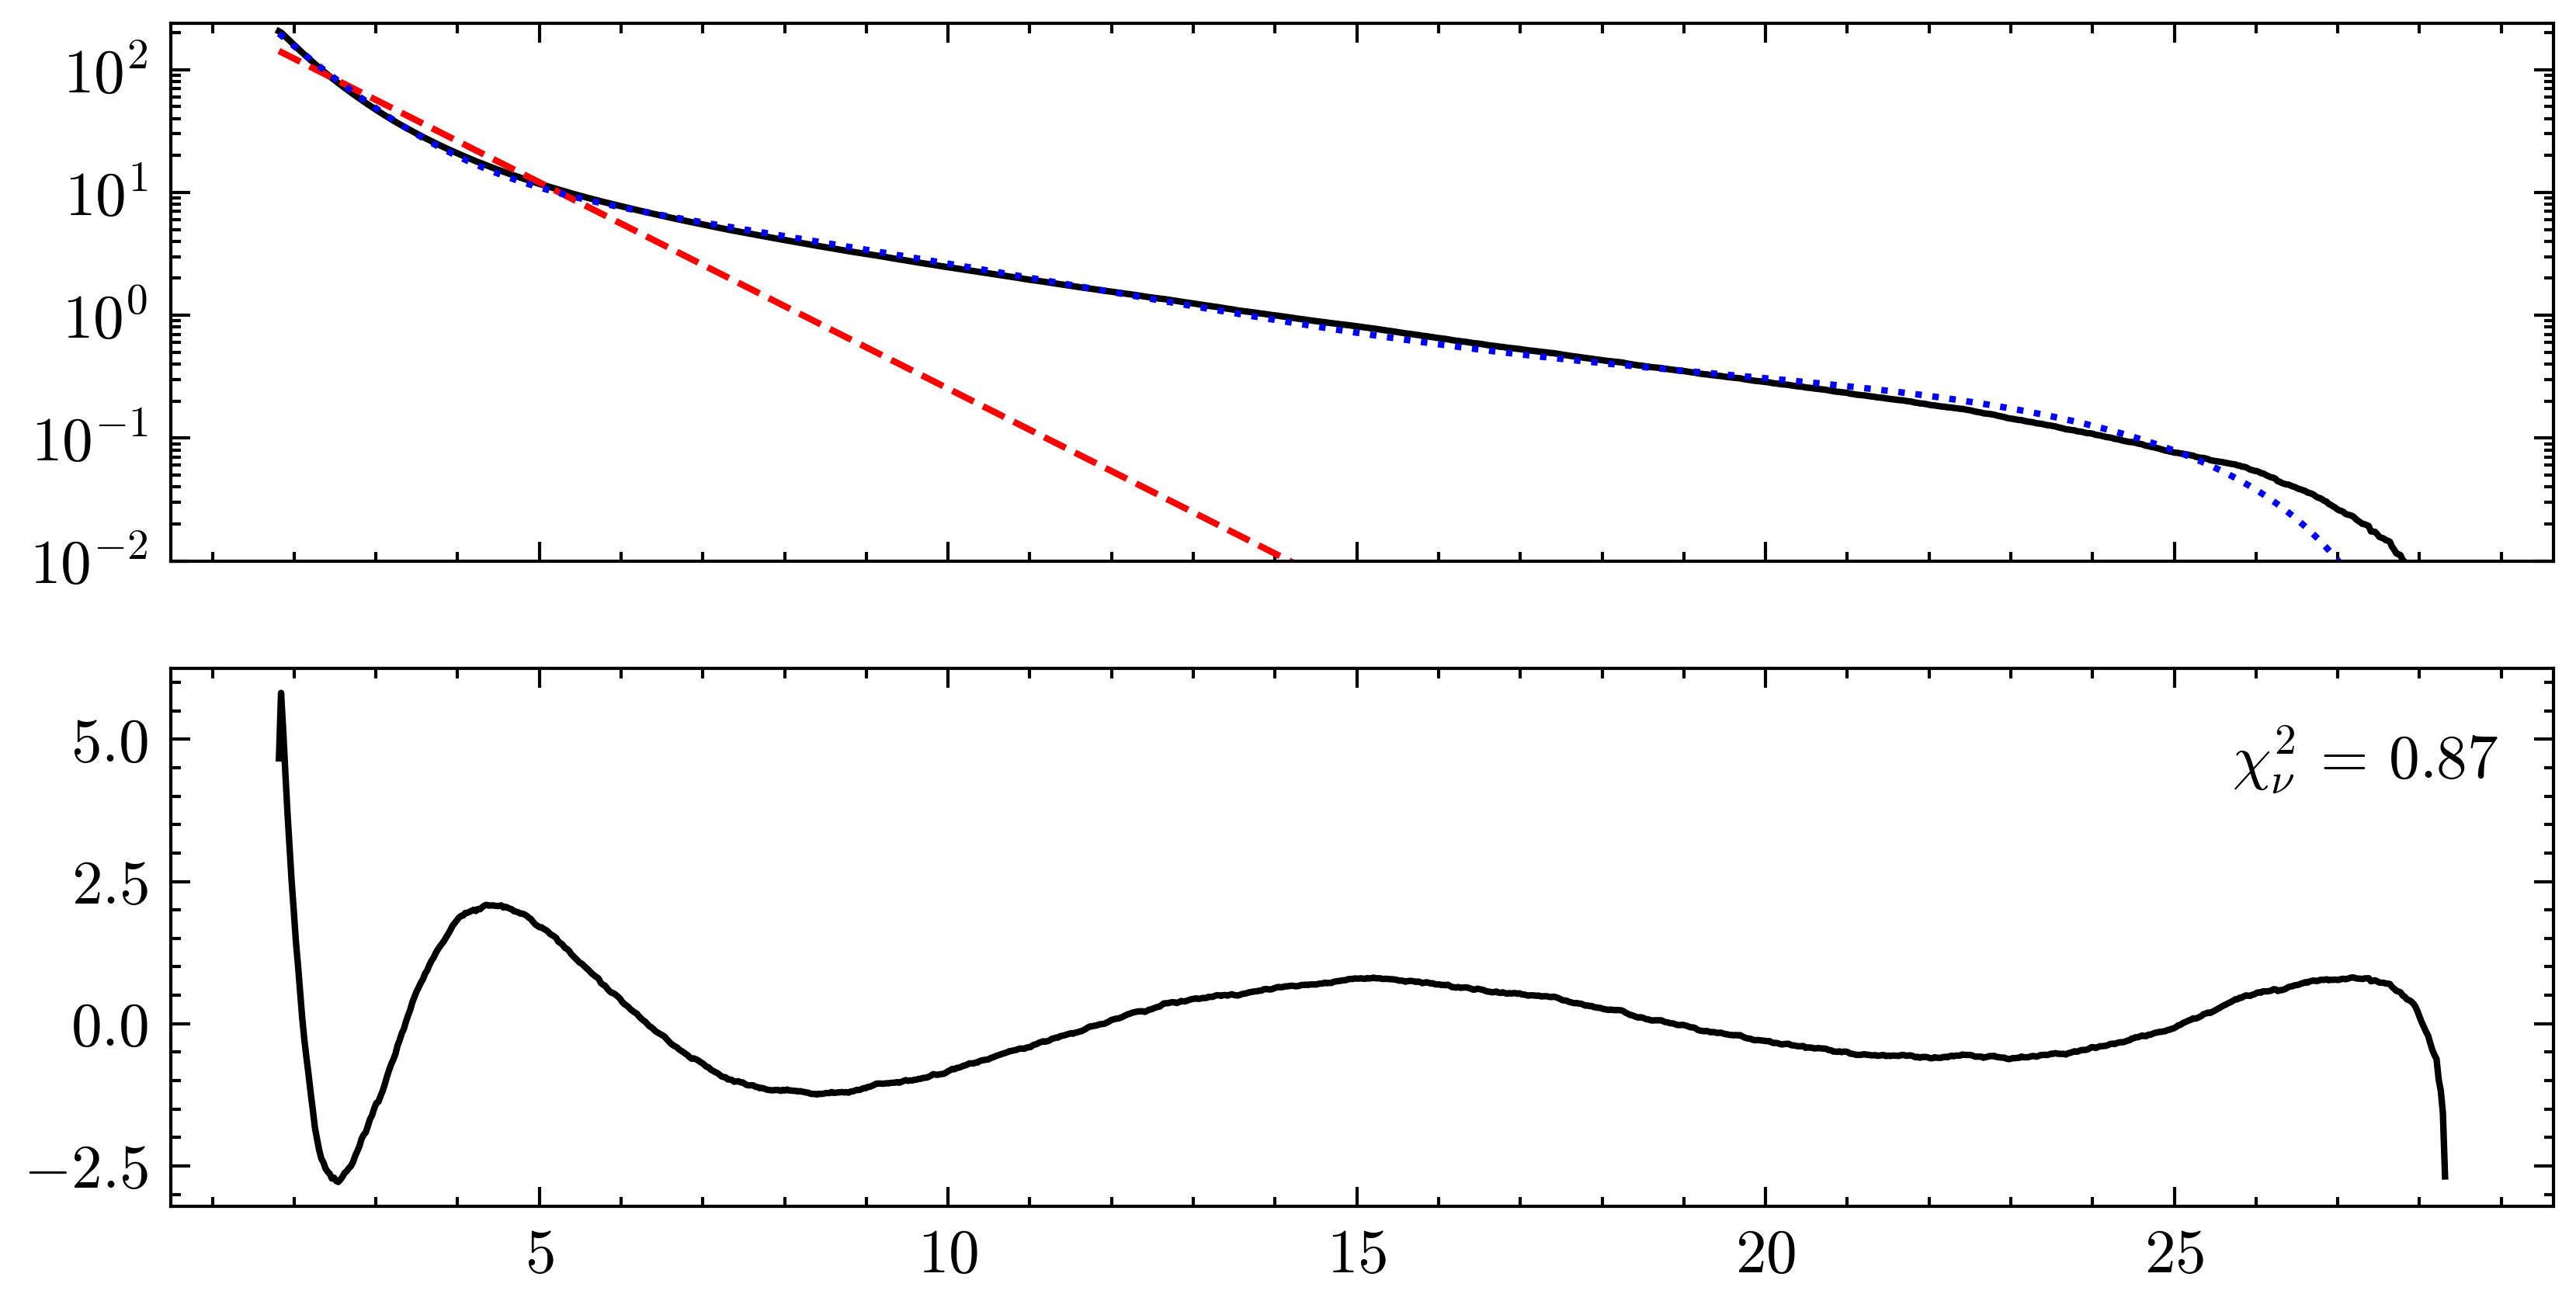

In [69]:
# fitting rate-threshold relationship

from scipy.optimize import curve_fit

def exponential(x, A, mu):
    return A * np.exp(x * mu)

def exponential_corrected(x, A, mu, c, d, e, f, g):
    return A * np.exp(x * mu) + np.poly1d([c, d, e, f, g])(x)

x, y = np.loadtxt('/cr/data01/filip/Data/muonAcquisition/mean_rates_t3_mip.txt', unpack=True)
ERROR = np.sqrt(y / 60)
NDOF = len(x) - 7
bounds_low = [0, -np.inf] + [-np.inf] * 5
bounds_high = [np.inf, 0] + [np.inf] * 5

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(x, y, marker='none')
popt, pcov = curve_fit(exponential, x, y,
                       sigma=ERROR,
                       bounds=(bounds_low[:2], bounds_high[:2]))
ax1.plot(x, exponential(x, *popt), marker='none')

popt, pcov = curve_fit(exponential_corrected, x, y,
                       sigma=ERROR,
                       bounds=(bounds_low, bounds_high))


ax1.plot(x, exponential_corrected(x, *popt), marker='none')
ax1.set_ylim(0.01, 240)
ax1.set_yscale('log')

ax2.plot(x, (y - exponential_corrected(x, *popt)) / ERROR)
ax2.legend(title=fr"$\chi_\nu^2$ = {np.sum((y - exponential_corrected(x, *popt))**2 / ERROR**2 / NDOF):.2f}")
# ax2.set_yscale('log')

In [74]:
x  = range(10000) / trace['mip_peak']
px = px/cumsum[0]
fx = popt #lambda x: exponential_corrected(x, *popt)

tools.pickle_save('x_px_fx.pkl', [x, px, fx])